# Predict Diseases using Machine Learning

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
import warnings
warnings.filterwarnings('ignore')
        

### Load the dataset

In [2]:
# Load the data
train_df = pd.read_csv('Training.csv')
test_df = pd.read_csv('Testing.csv')
# Print the first 5 rows of the dataframe.
train_df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  

[5 rows x 134 columns]

In [3]:
# Drop the 'Unnamed: 133' column from the dataframe.
train_df.drop('Unnamed: 133', axis=1, inplace=True)

In [4]:
# Print the first 5 rows of the dataframe.
test_df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze            prognosis  
0                  0     Fungal infection  
1                  0              Allergy  
2                  0                 GERD  
3                  0  Chronic cholestasis  
4                  0        Drug Reaction  

[5 rows x 133 columns]

### Exploratory Data Analysis

In [5]:
# See the shape of the dataframe training
train_df.shape

(4920, 133)

In [6]:
# See the shape of the dataframe testing
test_df.shape

(42, 133)

In [7]:
# See the columns present in our data as list
train_df.columns.tolist()

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


### Table of description of symptoms

| Symptom                            | Description                                  |
|------------------------------------|----------------------------------------------|
| itching                            | Skin irritation causing a desire to scratch   |
| skin_rash                          | Redness or inflammation of the skin          |
| nodal_skin_eruptions               | Eruptions or lesions on the skin              |
| continuous_sneezing                | Frequent and uninterrupted sneezing           |
| shivering                          | Trembling or shaking                          |
| chills                             | Sensation of cold accompanied by shivering    |
| joint_pain                         | Pain or discomfort in the joints              |
| stomach_pain                       | Ache or discomfort in the stomach             |
| acidity                            | Excessive acid in the stomach or esophagus    |
| ulcers_on_tongue                   | Open sores or lesions on the tongue           |
| muscle_wasting                     | Loss of muscle mass or muscle deterioration   |
| vomiting                           | Expelling the contents of the stomach         |
| burning_micturition                | Pain or burning sensation during urination    |
| spotting_ urination                | Abnormal or irregular urine discharge         |
| fatigue                            | Extreme tiredness or lack of energy           |
| weight_gain                        | Increase in body weight                       |
| anxiety                            | Feeling of unease or nervousness              |
| cold_hands_and_feets               | Cold sensation in the hands and feet          |
| mood_swings                        | Frequent changes in mood or emotional state   |
| weight_loss                        | Decrease in body weight                       |
| restlessness                       | Inability to rest or relax                    |
| lethargy                           | Lack of energy or enthusiasm                  |
| patches_in_throat                  | Abnormal or discolored patches in the throat  |
| irregular_sugar_level              | Fluctuations in blood sugar levels            |
| cough                              | Expelling air from the lungs with a sound     |
| high_fever                         | Elevated body temperature                     |
| sunken_eyes                        | Deeply set eyes with a hollow appearance      |
| breathlessness                     | Difficulty in breathing                       |
| sweating                           | Excessive perspiration                         |
| dehydration                        | Excessive loss of body fluids                 |
| indigestion                        | Difficulty in digesting food                  |
| headache                           | Ache or pain in the head                       |
| yellowish_skin                     | Yellow discoloration of the skin              |
| dark_urine                         | Dark-colored urine                            |
| nausea                             | Feeling of sickness or queasiness              |
| loss_of_appetite                   | Decreased desire to eat                        |
| pain_behind_the_eyes               | Ache or discomfort located behind the eyes    |
| back_pain                          | Ache or discomfort in the back                 |
| constipation                       | Difficulty in emptying the bowels             |
| abdominal_pain                     | Ache or discomfort in the abdomen              |
| diarrhoea                          | Frequent and watery bowel movements           |
| mild_fever                         | Slight increase in body temperature           |
| yellow_urine                       | Urine with a yellow color                      |
| yellowing_of_eyes                  | Yellow discoloration of the eyes              |
| acute_liver_failure                | Sudden and severe liver dysfunction           |
| fluid_overload                     | Excessive accumulation of fluid in the body   |
| swelling_of_stomach                | Abnormal enlargement of the stomach           |
| swelled_lymph_nodes                | Enlarged lymph nodes                          |
| malaise                            | General feeling of discomfort or unease       |
| blurred_and_distorted_vision       | Loss of clear vision or visual distortion     |
| phlegm                             | Thick mucus secreted by the respiratory tract |
| throat_irritation                  | Inflammation or discomfort in the throat      |
| redness_of_eyes                    | Red or bloodshot eyes                         |
| sinus_pressure                     | Pressure or discomfort in the sinuses         |
| runny_nose                         | Excessive discharge from the nose              |
| congestion                         | Blockage or stuffiness in the nose             |
| chest_pain                         | Ache or discomfort in the chest                |
| weakness_in_limbs                  | Lack of strength or power in the limbs        |
| fast_heart_rate                    | Rapid heartbeat                               |
| pain_during_bowel_movements        | Ache or discomfort experienced during bowel movements |
| pain_in_anal_region                | Ache or discomfort in the anal area           |
| bloody_stool                       | Stool containing blood                         |
| irritation_in_anus                 | Discomfort or itching in the anus              |
| neck_pain                          | Ache or discomfort in the neck                 |
| dizziness                          | Sensation of spinning or lightheadedness       |
| cramps                             | Painful muscle contractions                    |
| bruising                           | Discoloration of the skin due to injury        |
| obesity                            | Excessive body weight                          |
| swollen_legs                       | Enlarged or puffy legs                         |
| swollen_blood_vessels              | Enlarged or dilated blood vessels              |
| puffy_face_and_eyes                | Swelling or puffiness in the face and eyes     |
| enlarged_thyroid                   | Abnormal enlargement of the thyroid gland     |
| brittle_nails                      | Fragile or easily breakable nails             |
| swollen_extremeties                | Enlarged or puffy extremities                  |
| excessive_hunger                   | Unusually high or intense appetite             |
| extra_marital_contacts             | Engaging in sexual relationships outside of marriage |
| drying_and_tingling_lips           | Dryness and tingling sensation in the lips     |
| slurred_speech                     | Difficulty articulating words clearly          |
| knee_pain                          | Ache or discomfort in the knee                 |
| hip_joint_pain                     | Ache or discomfort in the hip joint            |
| muscle_weakness                    | Lack of strength or power in the muscles      |
| stiff_neck                         | Reduced range of motion or discomfort in the neck |
| swelling_joints                    | Enlargement or puffiness in the joints         |
| movement_stiffness                 | Reduced ability to move or stiffness in movement |
| spinning_movements                 | Sensation of spinning or rotating              |
| loss_of_balance                    | Impaired balance or coordination               |
| unsteadiness                       | Lack of stability or steadiness                |
| weakness_of_one_body_side          | Reduced strength or function on one side of the body |
| loss_of_smell                      | Diminished or complete loss of the sense of smell |
| bladder_discomfort                 | Discomfort or pain in the bladder               |
| foul_smell_of urine                | Offensive or unpleasant odor of urine          |
| continuous_feel_of_urine           | Constant sensation of needing to urinate       |
| passage_of_gases                   | Release of gas from the body                    |
| internal_itching                   | Itching or irritation inside the body           |
| toxic_look_(typhos)                | Appearance indicative of a toxic condition     |
| depression                         | Persistent feeling of sadness or low mood      |
| irritability                       | Easily provoked or agitated state               |
| muscle_pain                        | Ache or discomfort in the muscles              |
| altered_sensorium                  | Changes in consciousness or mental state       |
| red_spots_over_body                | Red spots or patches on the skin               |
| belly_pain                         | Ache or discomfort in the abdomen              |
| abnormal_menstruation              | Irregular or abnormal menstrual cycles         |
| dischromic _patches                | Abnormal patches or discoloration on the skin  |
| watering_from_eyes                 | Excessive tearing from the eyes                |
| increased_appetite                 | Heightened or excessive appetite               |
| polyuria                           | Excessive production of urine                   |
| family_history                     | History of a particular condition in the family |
| mucoid_sputum                      | Thick and sticky mucus produced by the respiratory tract |
| rusty_sputum                       | Sputum with a rusty or reddish color           |
| lack_of_concentration              | Difficulty in focusing or paying attention     |
| visual_disturbances                | Abnormalities or disturbances in vision        |
| receiving_blood_transfusion        | Receiving a transfusion of blood or blood products |
| receiving_unsterile_injections     | Receiving injections in an unsterile manner     |
| coma                               | Unconscious state with no response to stimuli  |
| stomach_bleeding                   | Bleeding in the stomach or gastric bleeding    |
| distention_of_abdomen              | Abnormal enlargement or swelling of the abdomen |
| history_of_alcohol_consumption     | Past or present alcohol consumption history    |
| fluid_overload.1                   | Excessive fluid in the body                    |
| blood_in_sputum                    | Presence of blood in the sputum                |
| prominent_veins_on_calf            | Noticeable veins on the calf muscles           |
| palpitations                       | Irregular or rapid heartbeats                  |
| painful_walking                    | Discomfort or pain experienced while walking   |
| pus_filled_pimples                 | Pimples filled with pus                         |
| blackheads                         | Small black spots or plugs on the skin         |
| scurring                           | Formation of scaly or flaky skin               |
| skin_peeling                       | Shedding or flaking of the outer skin layer    |
| silver_like_dusting                | Silvery or grayish flakes on the skin          |
| small_dents_in_nails               | Tiny depressions or dents in the nails         |
| inflammatory_nails                 | Inflammation or swelling around the nails      |
| blister                            | Small fluid-filled sac on the skin             |
| red_sore_around_nose               | Red and sore area around the nose              |
| yellow_crust_ooze                  | Yellowish crust or discharge from a wound      |


In [8]:
# See the summary of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [9]:
# Check for missing values
train_df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [10]:
# Total number of missing values
train_df.isnull().sum().sum()

0

In [11]:
# Check for duplicate values
train_df.duplicated().sum()

4616

In [12]:
# Check for unique values in each column
train_df.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64

In [13]:
# See the unique values in the 'prognosis' column
train_df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

#### Table with a description of prognosis

| Prognosis                                | Description                                          |
|------------------------------------------|------------------------------------------------------|
| Fungal infection                         | Infection caused by fungi                            |
| Hepatitis C                              | Hepatitis caused by the hepatitis C virus            |
| Hepatitis E                              | Hepatitis caused by the hepatitis E virus            |
| Alcoholic hepatitis                      | Inflammation of the liver due to alcohol consumption |
| Tuberculosis                             | Infectious disease affecting the lungs               |
| Common Cold                              | Viral infection causing symptoms like a cold         |
| Pneumonia                                | Infection causing inflammation of the lungs          |
| Dimorphic hemmorhoids(piles)             | Swollen veins in the rectum and anus                 |
| Heart attack                             | Damage to the heart muscle due to blocked blood flow |
| Varicose veins                           | Enlarged and twisted veins                          |
| Hypothyroidism                           | Underactive thyroid gland                            |
| Hyperthyroidism                          | Overactive thyroid gland                             |
| Hypoglycemia                             | Low blood sugar levels                               |
| Osteoarthristis                          | Degenerative joint disease                           |
| Arthritis                                | Inflammation of the joints                           |
| (vertigo) Paroymsal Positional Vertigo   | Dizziness triggered by specific head movements       |
| Acne                                     | Skin condition characterized by pimples              |
| Urinary tract infection                  | Infection in the urinary tract                       |
| Psoriasis                                | Chronic skin condition causing red, scaly patches    |
| Hepatitis D                              | Hepatitis caused by the hepatitis D virus            |
| Hepatitis B                              | Hepatitis caused by the hepatitis B virus            |
| Allergy                                  | Immune response to a specific substance              |
| Hepatitis A                              | Hepatitis caused by the hepatitis A virus            |
| GERD                                     | Gastroesophageal reflux disease                      |
| Chronic cholestasis                      | Impaired bile flow from the liver                    |
| Drug Reaction                            | Adverse reaction to a medication                     |
| Peptic ulcer disease                     | Open sores in the lining of the stomach or duodenum  |
| AIDS                                     | Acquired immunodeficiency syndrome                   |
| Diabetes                                 | Chronic condition affecting blood sugar levels        |
| Gastroenteritis                          | Inflammation of the stomach and intestines           |
| Bronchial Asthma                         | Chronic respiratory condition causing breathing difficulties |
| Hypertension                             | High blood pressure                                  |
| Migraine                                 | Recurring headache with moderate to severe pain       |
| Cervical spondylosis                     | Degeneration of the cervical spine                   |
| Paralysis (brain hemorrhage)             | Loss of muscle function due to bleeding in the brain |
| Jaundice                                 | Yellowing of the skin and eyes                       |
| Malaria                                  | Infectious disease transmitted by mosquitoes          |
| Chicken pox                              | Viral infection causing itchy rash and blisters      |
| Dengue                                   | Viral infection transmitted by mosquitoes            |
| Typhoid                                  | Bacterial infection causing fever and gastrointestinal symptoms |
| Impetigo                                 | Highly contagious skin infection                     |

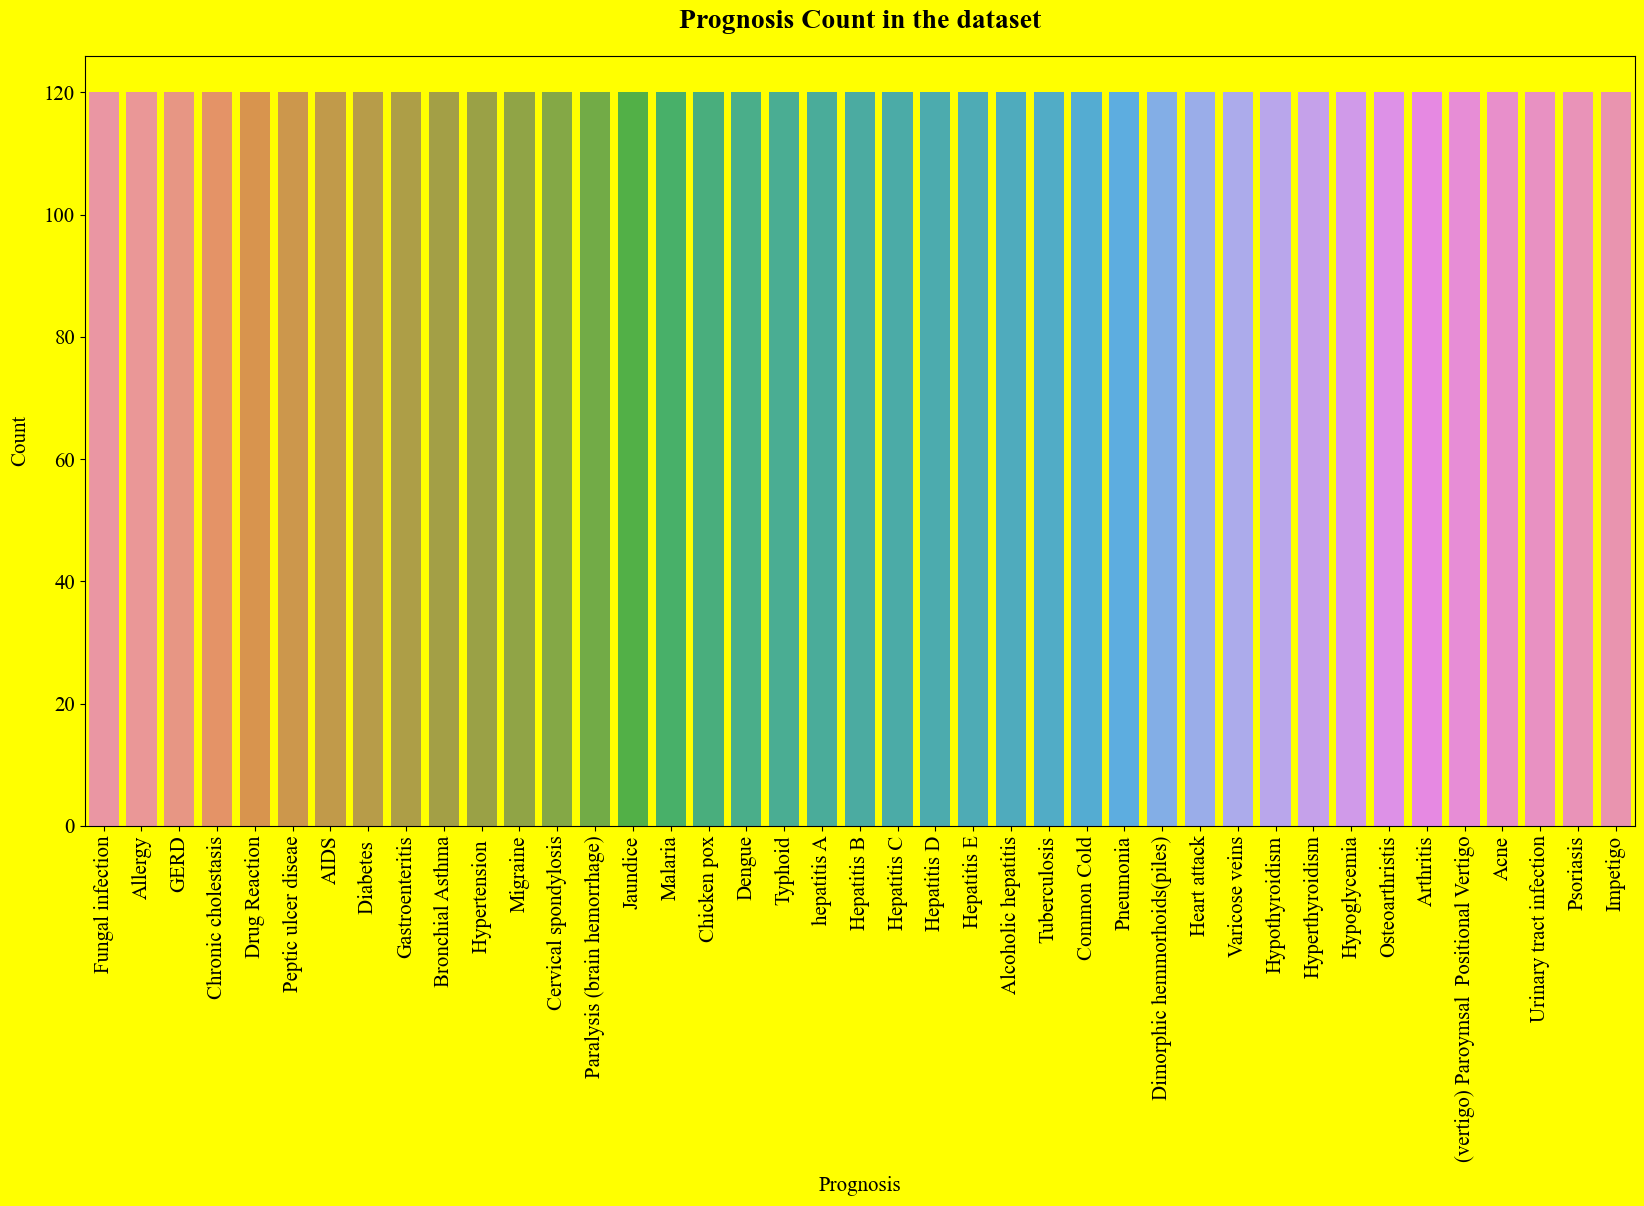

In [22]:
# Visualize the count of 'prognosis' column
plt.figure(figsize=(20,10))
sns.countplot(x='prognosis', data=train_df)
plt.xticks(rotation=90)
plt.xlabel('Prognosis', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Prognosis Count in the dataset', fontsize=20)
plt.show()

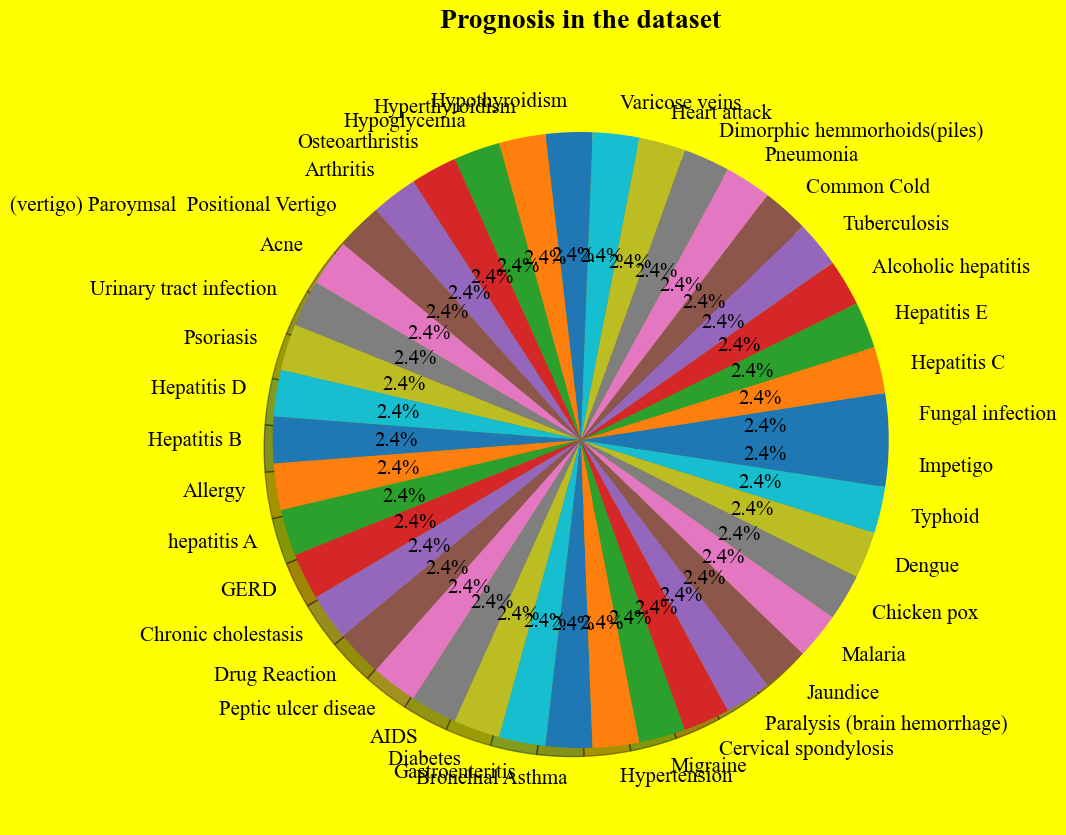

In [21]:
# Pie chart of 'prognosis' column
plt.figure(figsize=(20,10))
plt.pie(train_df['prognosis'].value_counts(), labels=train_df['prognosis'].value_counts().index, autopct='%1.1f%%', shadow=True)
plt.title('Prognosis in the dataset', fontsize=20)
plt.show()

In [14]:
# Show correlation between columns
train_df.corr()


itching  skin_rash  nodal_skin_eruptions  \
itching               1.000000   0.318158              0.326439   
skin_rash             0.318158   1.000000              0.298143   
nodal_skin_eruptions  0.326439   0.298143              1.000000   
continuous_sneezing  -0.086906  -0.094786             -0.032566   
shivering            -0.059893  -0.065324             -0.022444   
...                        ...        ...                   ...   
small_dents_in_nails -0.061573   0.331087             -0.023073   
inflammatory_nails   -0.061573   0.331087             -0.023073   
blister              -0.061573   0.331087             -0.023073   
red_sore_around_nose -0.061573   0.331087             -0.023073   
yellow_crust_ooze    -0.061573   0.331087             -0.023073   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.086906  -0.059893 -0.175905   -0.160650   
skin_rash                       -0.094786  -0.065324 -0.029324    0.171134   
nodal_skin_eruptions            -0.032566  -0.022444 -0.065917   -0.060200   
continuous_sneezing              1.000000   0.608981  0.446238   -0.087351   
shivering                        0.608981   1.000000  0.295332   -0.060200   
...                                   ...        ...       ...         ...   
small_dents_in_nails            -0.033480  -0.023073 -0.067765    0.359845   
inflammatory_nails              -0.033480  -0.023073 -0.067765    0.359845   
blister                         -0.033480  -0.023073 -0.067765   -0.061889   
red_sore_around_nose            -0.033480  -0.023073 -0.067765   -0.061889   
yellow_crust_ooze               -0.033480  -0.023073 -0.067765   -0.061889   

                      stomach_pain   acidity  ulcers_on_tongue  ...  \
itching                   0.202850 -0.086906         -0.059893  ...   
skin_rash                 0.161784 -0.094786         -0.065324  ...   
nodal_skin_eruptions     -0.032566 -0.032566         -0.022444  ...   
continuous_sneezing      -0.047254 -0.047254         -0.032566  ...   
shivering                -0.032566 -0.032566         -0.022444  ...   
...                            ...       ...               ...  ...   
small_dents_in_nails     -0.033480 -0.033480         -0.023073  ...   
inflammatory_nails       -0.033480 -0.033480         -0.023073  ...   
blister                  -0.033480 -0.033480         -0.023073  ...   
red_sore_around_nose     -0.033480 -0.033480         -0.023073  ...   
yellow_crust_ooze        -0.033480 -0.033480         -0.023073  ...   

                      pus_filled_pimples  blackheads  scurring  skin_peeling  \
itching                        -0.059893   -0.059893 -0.059893     -0.061573   
skin_rash                       0.320859    0.320859  0.320859      0.331087   
nodal_skin_eruptions           -0.022444   -0.022444 -0.022444     -0.023073   
continuous_sneezing            -0.032566   -0.032566 -0.032566     -0.033480   
shivering                      -0.022444   -0.022444 -0.022444     -0.023073   
...                                  ...         ...       ...           ...   
small_dents_in_nails           -0.023073   -0.023073 -0.023073      0.946120   
inflammatory_nails             -0.023073   -0.023073 -0.023073      0.946120   
blister                        -0.023073   -0.023073 -0.023073     -0.023720   
red_sore_around_nose           -0.023073   -0.023073 -0.023073     -0.023720   
yellow_crust_ooze              -0.023073   -0.023073 -0.023073     -0.023720   

                      silver_like_dusting  small_dents_in_nails  \
itching                         -0.061573             -0.061573   
skin_rash                        0.331087              0.331087   
nodal_skin_eruptions            -0.023073             -0.023073   
continuous_sneezing             -0.033480             -0.033480   
shivering                       -0.023073             -0.023073   
...                                   ...                   ...  

In [54]:
# Define the symptom columns
symptom_columns = train_df.columns[1:]  # Exclude the 'prognosis' column

# Create an empty DataFrame to store the cross-tabulation results
cross_tab_df = pd.DataFrame()

# Iterate over the symptom columns and compute the cross-tabulation
for column in symptom_columns:
    cross_tab = pd.crosstab(train_df['prognosis'], train_df[column])
    cross_tab_df[column] = cross_tab.idxmax(axis=1)

# Display the cross-tabulation table
print(cross_tab_df)

                                         skin_rash  nodal_skin_eruptions  \
prognosis                                                                  
(vertigo) Paroymsal  Positional Vertigo          0                     0   
AIDS                                             0                     0   
Acne                                             1                     0   
Alcoholic hepatitis                              0                     0   
Allergy                                          0                     0   
Arthritis                                        0                     0   
Bronchial Asthma                                 0                     0   
Cervical spondylosis                             0                     0   
Chicken pox                                      1                     0   
Chronic cholestasis                              0                     0   
Common Cold                                      0                     0   
Dengue      

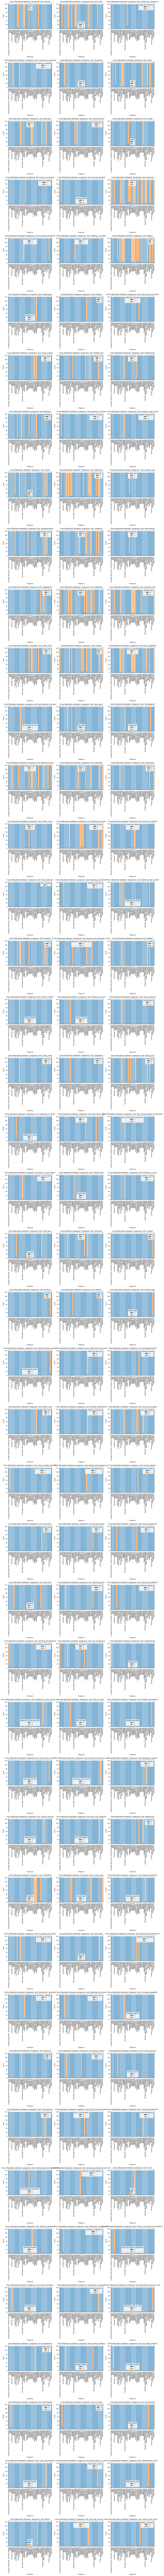

In [60]:
# Get the number of columns (excluding 'prognosis')
num_columns = len(train_df.columns) - 1

# Calculate the number of rows and columns for the subplots grid
num_rows = int((num_columns + 2) / 3)  # Adjust the number of rows as needed
num_cols = 3  # Set the number of columns per row

# Calculate the figure size based on the number of rows and columns
fig_width = 16
fig_height = 6 * num_rows

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the columns (excluding 'prognosis') and create the bar plots
for i, column in enumerate(train_df.columns):
    if column != 'prognosis':
        cross_tab = pd.crosstab(train_df['prognosis'], train_df[column])
        ax = axes[i]

        cross_tab.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f"Cross-Tabulation between 'prognosis' and '{column}'")
        ax.set_xlabel('Prognosis')
        ax.set_ylabel('Count')

# Hide the extra subplots if there are more axes than columns
if len(axes) > num_columns:
    for ax in axes[num_columns:]:
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout(pad=1.5)

# Display the plot
plt.show()

### Split the dataset

In [61]:
# Split the data into training and testing sets

X = train_df.drop('prognosis', axis=1)
y = train_df['prognosis']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

### Model training

In [62]:
# Model Building Decision Tree Classifier

tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred=tree.predict(X_test)
print('Accuracy score of Decision Tree Classifier is:',accuracy_score(y_test,tree_pred))


Accuracy score of Decision Tree Classifier is: 1.0


In [63]:
# Model Building Random Forest Classifier

forest=RandomForestClassifier()
forest.fit(X_train,y_train)
forest_pred=forest.predict(X_test)
print('Accuracy score of Random Forest Classifier is:',accuracy_score(y_test,forest_pred))


Accuracy score of Random Forest Classifier is: 1.0


In [64]:
# Model Building Logistic Regression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred=logreg.predict(X_test)
print('Accuracy score of Logistic Regression is:',accuracy_score(y_test,logreg_pred))


Accuracy score of Logistic Regression is: 1.0
